# Exercises week 2

Dependencies needed to run this Notebook (uncomment the lines below to install dependencies if needed)

In [14]:
# !pip install -m requirements.txt

# or
#%pip install requests==2.31.0
#%pip install scipy

## Exercises 1

Import **requests** in order to download the tsv files, and numpy and Pandas to work with data.

In [15]:
import requests
import numpy as np
import pandas as pd

### 1.1 Start by downloading these four datasets

In [16]:
for i in range(1,5):
    req = requests.get(f'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data{i}.tsv')
    
    with open(f'data{i}.tsv', 'w') as f:
        f.write(req.text)   

Load each files content into a DataFrame naming the collums x and y, and then these dataframes into a dict.

In [17]:
data = {f'df{i}': pd.read_csv(f'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data{i}.tsv', sep='\t', names=['x', 'y']) for i in range(1,5)}

### 1.2. Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset
_(Use python string formatting to print precisely two decimal places of these results to the output cell.)_

In [18]:
for i, df in enumerate(data.values(), start=1):
    x_mean = np.mean(df['x'])
    y_mean = np.mean(df['y'])
    
    print(f'data{i}.tsv file')
    print('=================')
    print(f'Mean of X values: {x_mean:.2f}')
    print(f'Mean of Y values: {y_mean:.2f}')
    print()

data1.tsv file
Mean of X values: 9.00
Mean of Y values: 7.50

data2.tsv file
Mean of X values: 9.00
Mean of Y values: 7.50

data3.tsv file
Mean of X values: 9.00
Mean of Y values: 7.50

data4.tsv file
Mean of X values: 9.00
Mean of Y values: 7.50



### 1.3 Now calculate the variance for all of the various sets of x- and y-values, by using the numpy function var.
Print it to three decimal places.

In [19]:
for i, df in enumerate(data.values(), start=1):
    x_var = np.var(df['x'])     # here is calculated population variance, 
    y_var = np.var(df['y'])     # if sample variance is preferred a "ddof=1" parameter is needed, or use pd.var() instead.
    
    
    print(f'Variance of data in data{i}.tsv file')
    print('=================')
    print(f'Variation of X values: {x_var:.3f}')
    print(f'Variation of Y values: {y_var:.3f}')
    print()

Variance of data in data1.tsv file
Variation of X values: 10.000
Variation of Y values: 3.752

Variance of data in data2.tsv file
Variation of X values: 10.000
Variation of Y values: 3.752

Variance of data in data3.tsv file
Variation of X values: 10.000
Variation of Y values: 3.748

Variance of data in data4.tsv file
Variation of X values: 10.000
Variation of Y values: 3.748



### 1.4 Use numpy to calculate the Pearson correlation between x- and y-values for all four data sets 
(also print to three decimal places)

In [20]:
for i, df in enumerate(data.values(), start=1):
    matrix = np.corrcoef(df['x'], df['y'])
    
    print(f'PCC of data in data{i}.tsv file')
    print('=================')
    print(f'PCC between x and y: {matrix[0,1]:.3f}')
    print()

PCC of data in data1.tsv file
PCC between x and y: 0.816

PCC of data in data2.tsv file
PCC between x and y: 0.816

PCC of data in data3.tsv file
PCC between x and y: 0.816

PCC of data in data4.tsv file
PCC between x and y: 0.817



### 1.5 use linear regression to fit a straight line f(x)=ax+b through each dataset and report a and b
(to two decimal places)

In [21]:
from scipy import stats

In [22]:
for i, df in enumerate(data.values(), start=1):
    a, b, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])
    
    print(f'Linier regression of data in data{i}.tsv file')
    print('==============================================')
    print(f'The value of a: {a:.2f}')
    print(f'The value of b: {b:.2f}')
    print()

Linier regression of data in data1.tsv file
The value of a: 0.50
The value of b: 3.00

Linier regression of data in data2.tsv file
The value of a: 0.50
The value of b: 3.00

Linier regression of data in data3.tsv file
The value of a: 0.50
The value of b: 3.00

Linier regression of data in data4.tsv file
The value of a: 0.50
The value of b: 3.00



### 1.6 Comment on the results from the previous steps. What do you observe?

Generally, the datasets are very similar concerning the **Mean** of their x and y data (1.2).  
The **Variance** of its x-values is precisely 10 in all datasets, and practically equal for the y-values, with a small difference of .004 between datasets (1, 2), and (3, 4) (1.3).  
The **correlation** between x- and y-values in all four datasets is also very close to being equal (1.4).     
Regarding the **linear regression** analysis, the slope corresponding to all datasets is 0.5, and the y-intercept is at 3.0 (1.5).  
So, even though the actual data in the four datasets differ, they seem equal when viewed through the above tools.

### 1.7 plot the four datasets using matplotlib.pyplot
* Use a two-by-two subplot to put all of the plots nicely in a grid and 
* use the same x and y range for all four plots. 
* And include the linear fit in all four plots.

In [23]:
import matplotlib.pyplot as plt

In [24]:
a, b, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])

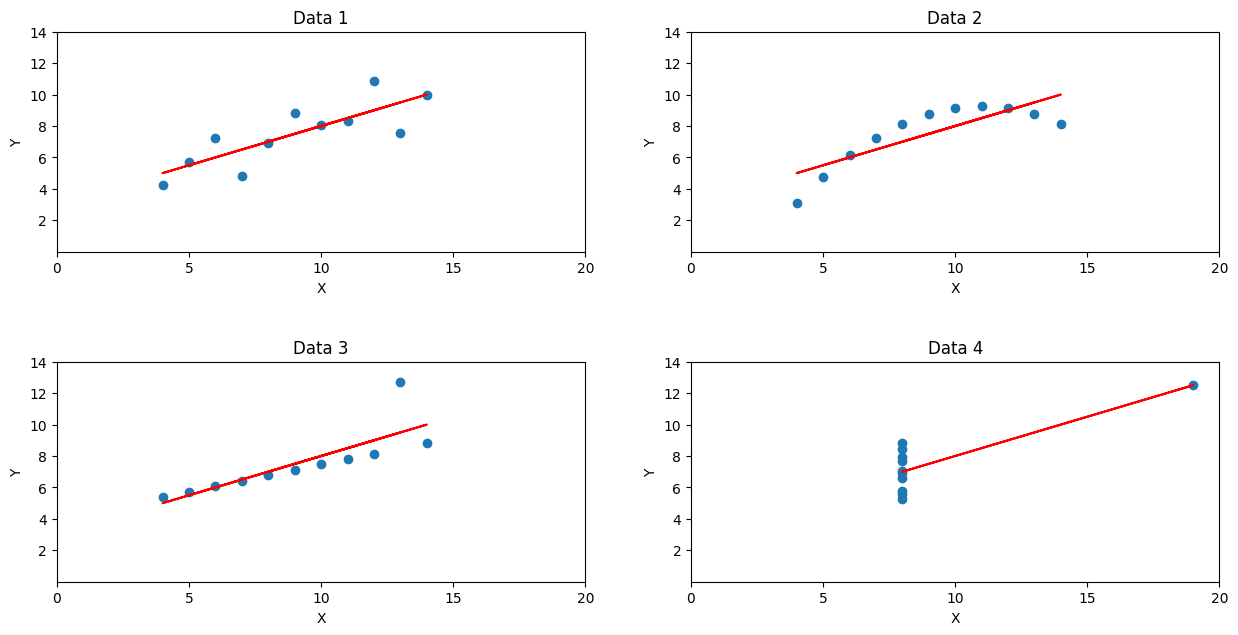

In [25]:
fig = plt.figure(figsize=(15, 20))  # create a figure (canvas like)
plt.subplots_adjust(hspace=0.5)  # addjust the space between the rows

for i, df in enumerate(data.values(), start=1):
    
    a, b, *args = stats.linregress(df['x'], df['y']) # calculate the linear regression
    reg = a * df['x'] + b # calculate the y koordiantes for the regression line (slope * x-values * intersction).

    # add the data to a subplot
    ax = fig.add_subplot(len(df)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    ax.set_title(f'Data {i}')
    ax.set_xlim([0, 20]) # set x axis to show from 0 to 20
    ax.set_ylim([0, 14]) # set y axis to show from 0 to 14
    ax.set_xticks(range(0, 21, 5)) # adjust the x-ticks layout
    ax.set_yticks(range(2, 15, 2)) # adjust the y-ticks layout
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    ax.scatter(df['x'], df['y']) # add data to the chart (x,y)
    ax.plot(df['x'], reg, color='red') # add the regression line

plt.show()

### 1.8 Explain - in your own words - what you think my point with this exercise is.

I believe the purpose of these exercises is partly to gain hands-on experience with Python's numpy, pandas, scipy, and matplotlib libraries, in conjunction with basic statistical operations. They also aim to deepen our understanding of how datasets with identical statistical properties, such as mean, variance, and correlation, can appear similar when subjected to statistical analyses. However, this does not necessarily imply that the datasets are identical or can be interpreted as such. For instance, datasets with the same mean, variance, and correlation may still differ significantly. The visual look of the data on the other hand is clearly showing a difference in what the data tell, and it shows the importance of visual plots when working with data.

### 1.9 What did you get out of asking the LLM about the previous sub-question? 
* How did you even go about asking the LLM about the point of the entire set of questions? 
* Reflect on whether or not the LLM helped you get smarter?

Generally, I used ChatGPT for two things. Instead of using the documentation of Python libraries to figure out which methods were relevant for a specific operation, I used the LLM as a reference. This wasn't much different from what I did earlier with, for instance, Stack Overflow (Google). I have forced myself to understand what I got from the LLM, and not just accept it. For me, it is clearly the best way to learn. First, explain to myself what I want, then ask the LLM how it's done, and then keep on asking "why" until I understand the topic.

Another thing I used ChatGPT for in this assignment has been to refresh my knowledge about Mean, Variance, PCC, and other basic statistical tools. For this, I also used other online resources, mainly YouTube, but ChatGPT was a help.

Regarding the last question (Reflect on whether or not the LLM helped you get smarter?): Then yes, it is a brilliant tutor, especially if one keeps on asking "why" to everything until one gets it.

## Exercise 2: Questions for the lecture.

### 2.1 What is the difference between data and metadata? 

Data is the raw data collected or given. Meta data is data about data.    
Related to "Anscombe's quartet" the numbers in the tsv files are the data.    
An example of metadata would be the information about how these datasets where created (e.g what is writting in the wikipedia page).

### 2.1.1 How does that relate to the GPS tracks-example?

The data would be what is in the xml file. The metadata would be the generated trees, houses an streets in the google earth video example.    
The data in it self can be a bit abstract to think about but when put into a context it suddently makes more sense.

### 2.2 Sune says that the human eye is a great tool for data analysis. 
##### Do you agree? Explain why/why not.

If we think of the eye as a tool for generating abstractions, it takes in raw caotic data and organises it into a meaningfull, simplified and context related information. Then yes i think it is a great tool for dataanalisys. 

##### Mention something that the human eye is very good at.

Creating an efficient interface to a more complex dataset. 

##### Can you think of something that is difficult for the human eye. Explain why your example is difficult.

When what we look at becomes to detailed it is gennerally more difficult for the eye to grasp. Again the idea of the eye creating an abstraction or an interface to the complex underliying datastructures.

##### Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

"Simpson’s Paradox is a statistical phenomenon where an association between two variables in a population emerges, disappears or reverses when the population is divided into subpopulations. For instance, two variables may be positively associated in a population, but be independent or even negatively associated in all subpopulations." - https://plato.stanford.edu/entries/paradox-simpson/

##### Explain the differnece between exploratory and explanatory data analysis

**Exploratory Data Analysis**     
The porpous of exploratory Data Analysis is to get a broad overview of the domain under investigation.      

**Explanatory data analysis**     
Is about explaning the data or deliver a message from what you think the data is telling you. 

## Part 2: Visualizing patterns in the data

In [26]:
#%pip install numpy pandas Pyarrow matplotlib

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
data = pd.read_csv("data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")

In [30]:
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'}
focuscrimes = pd.Series(sorted(focuscrimes))

In [31]:
data['date'] = pd.to_datetime(data['Date']) # convert from text to datetime
data['year'] = data['date'].dt.year         # get the year

#### 2.1 Weekly patterns

In [32]:
weekday_order = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

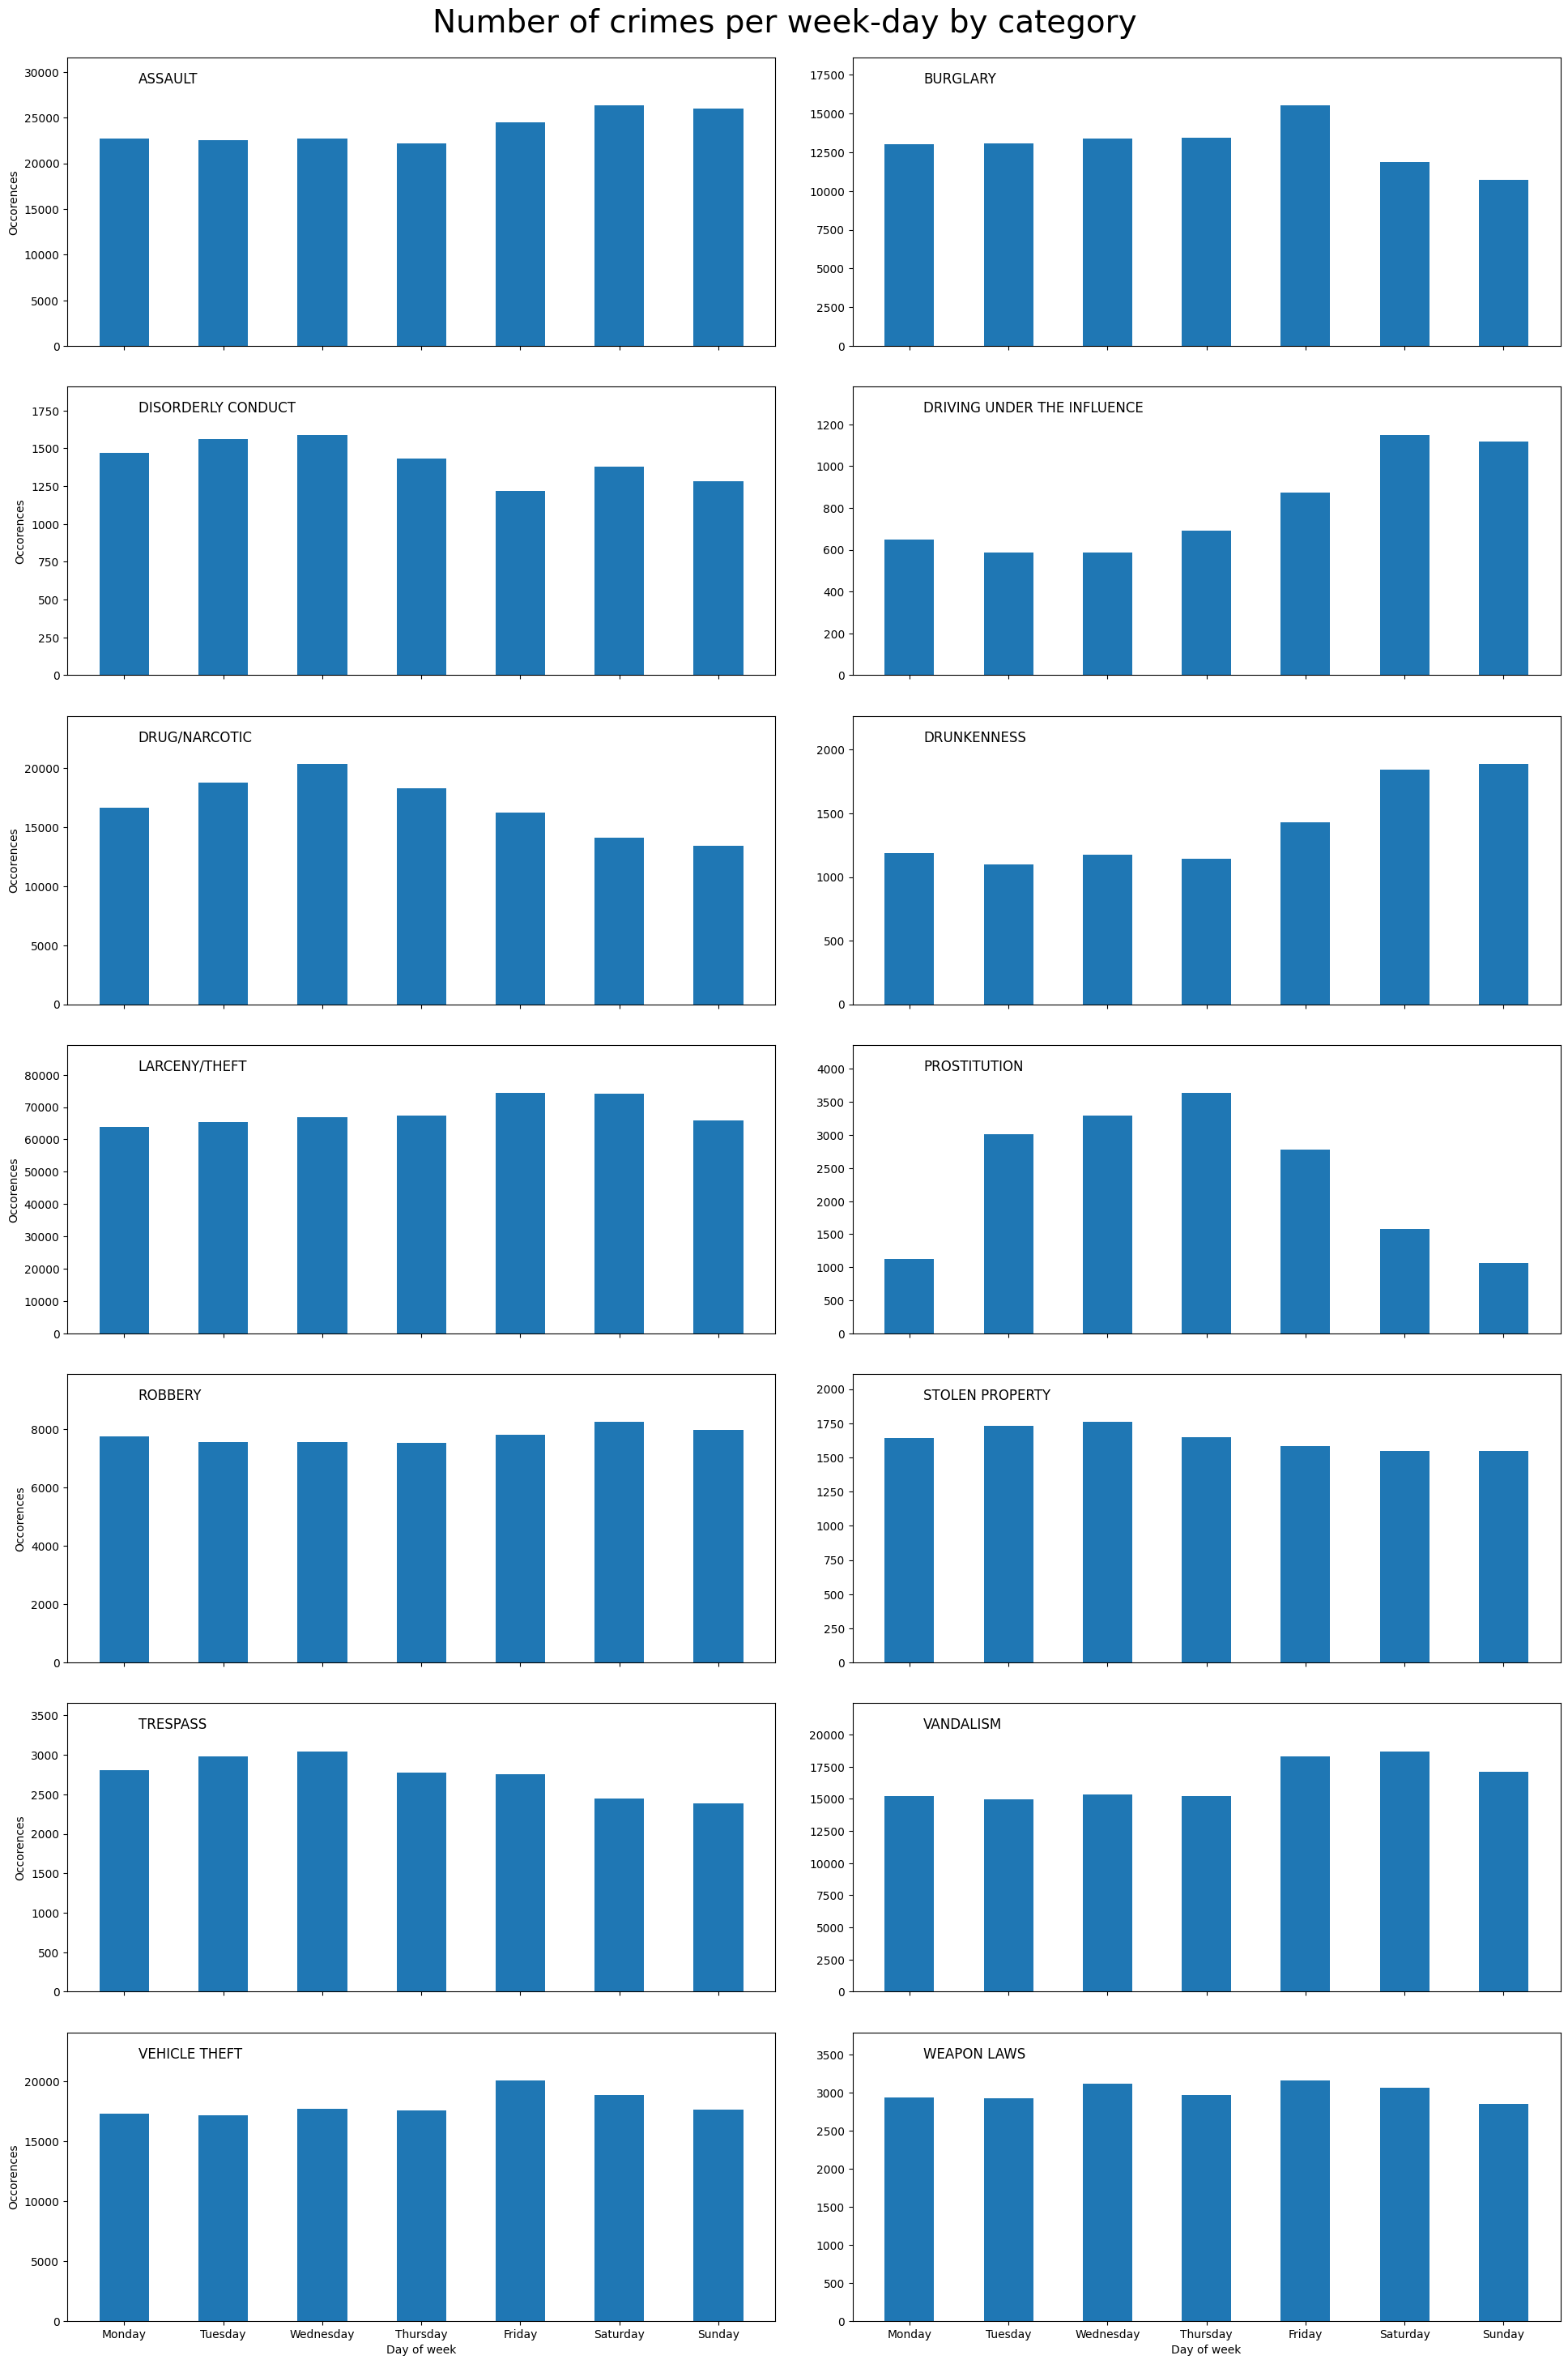

In [33]:
fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per week-day by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    crime_counts_per_day = crime_data['DayOfWeek'].value_counts()#.sort_index() # count the crimes per week-day for this category
    
    crime_counts_per_day = crime_counts_per_day.reindex(sorted(crime_counts_per_day.index, key=lambda day: weekday_order[day])) # sort the in a normal week order

    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_day.index, crime_counts_per_day.values, width=0.5) # add data to the chart (x,y)
    
    # add / remove years and years-title on all or the last 2
    ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Day of week')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.


#### 2.2 The months

We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

In [34]:
data['date'] = pd.to_datetime(data['Date'])
data['month'] = data['date'].dt.month

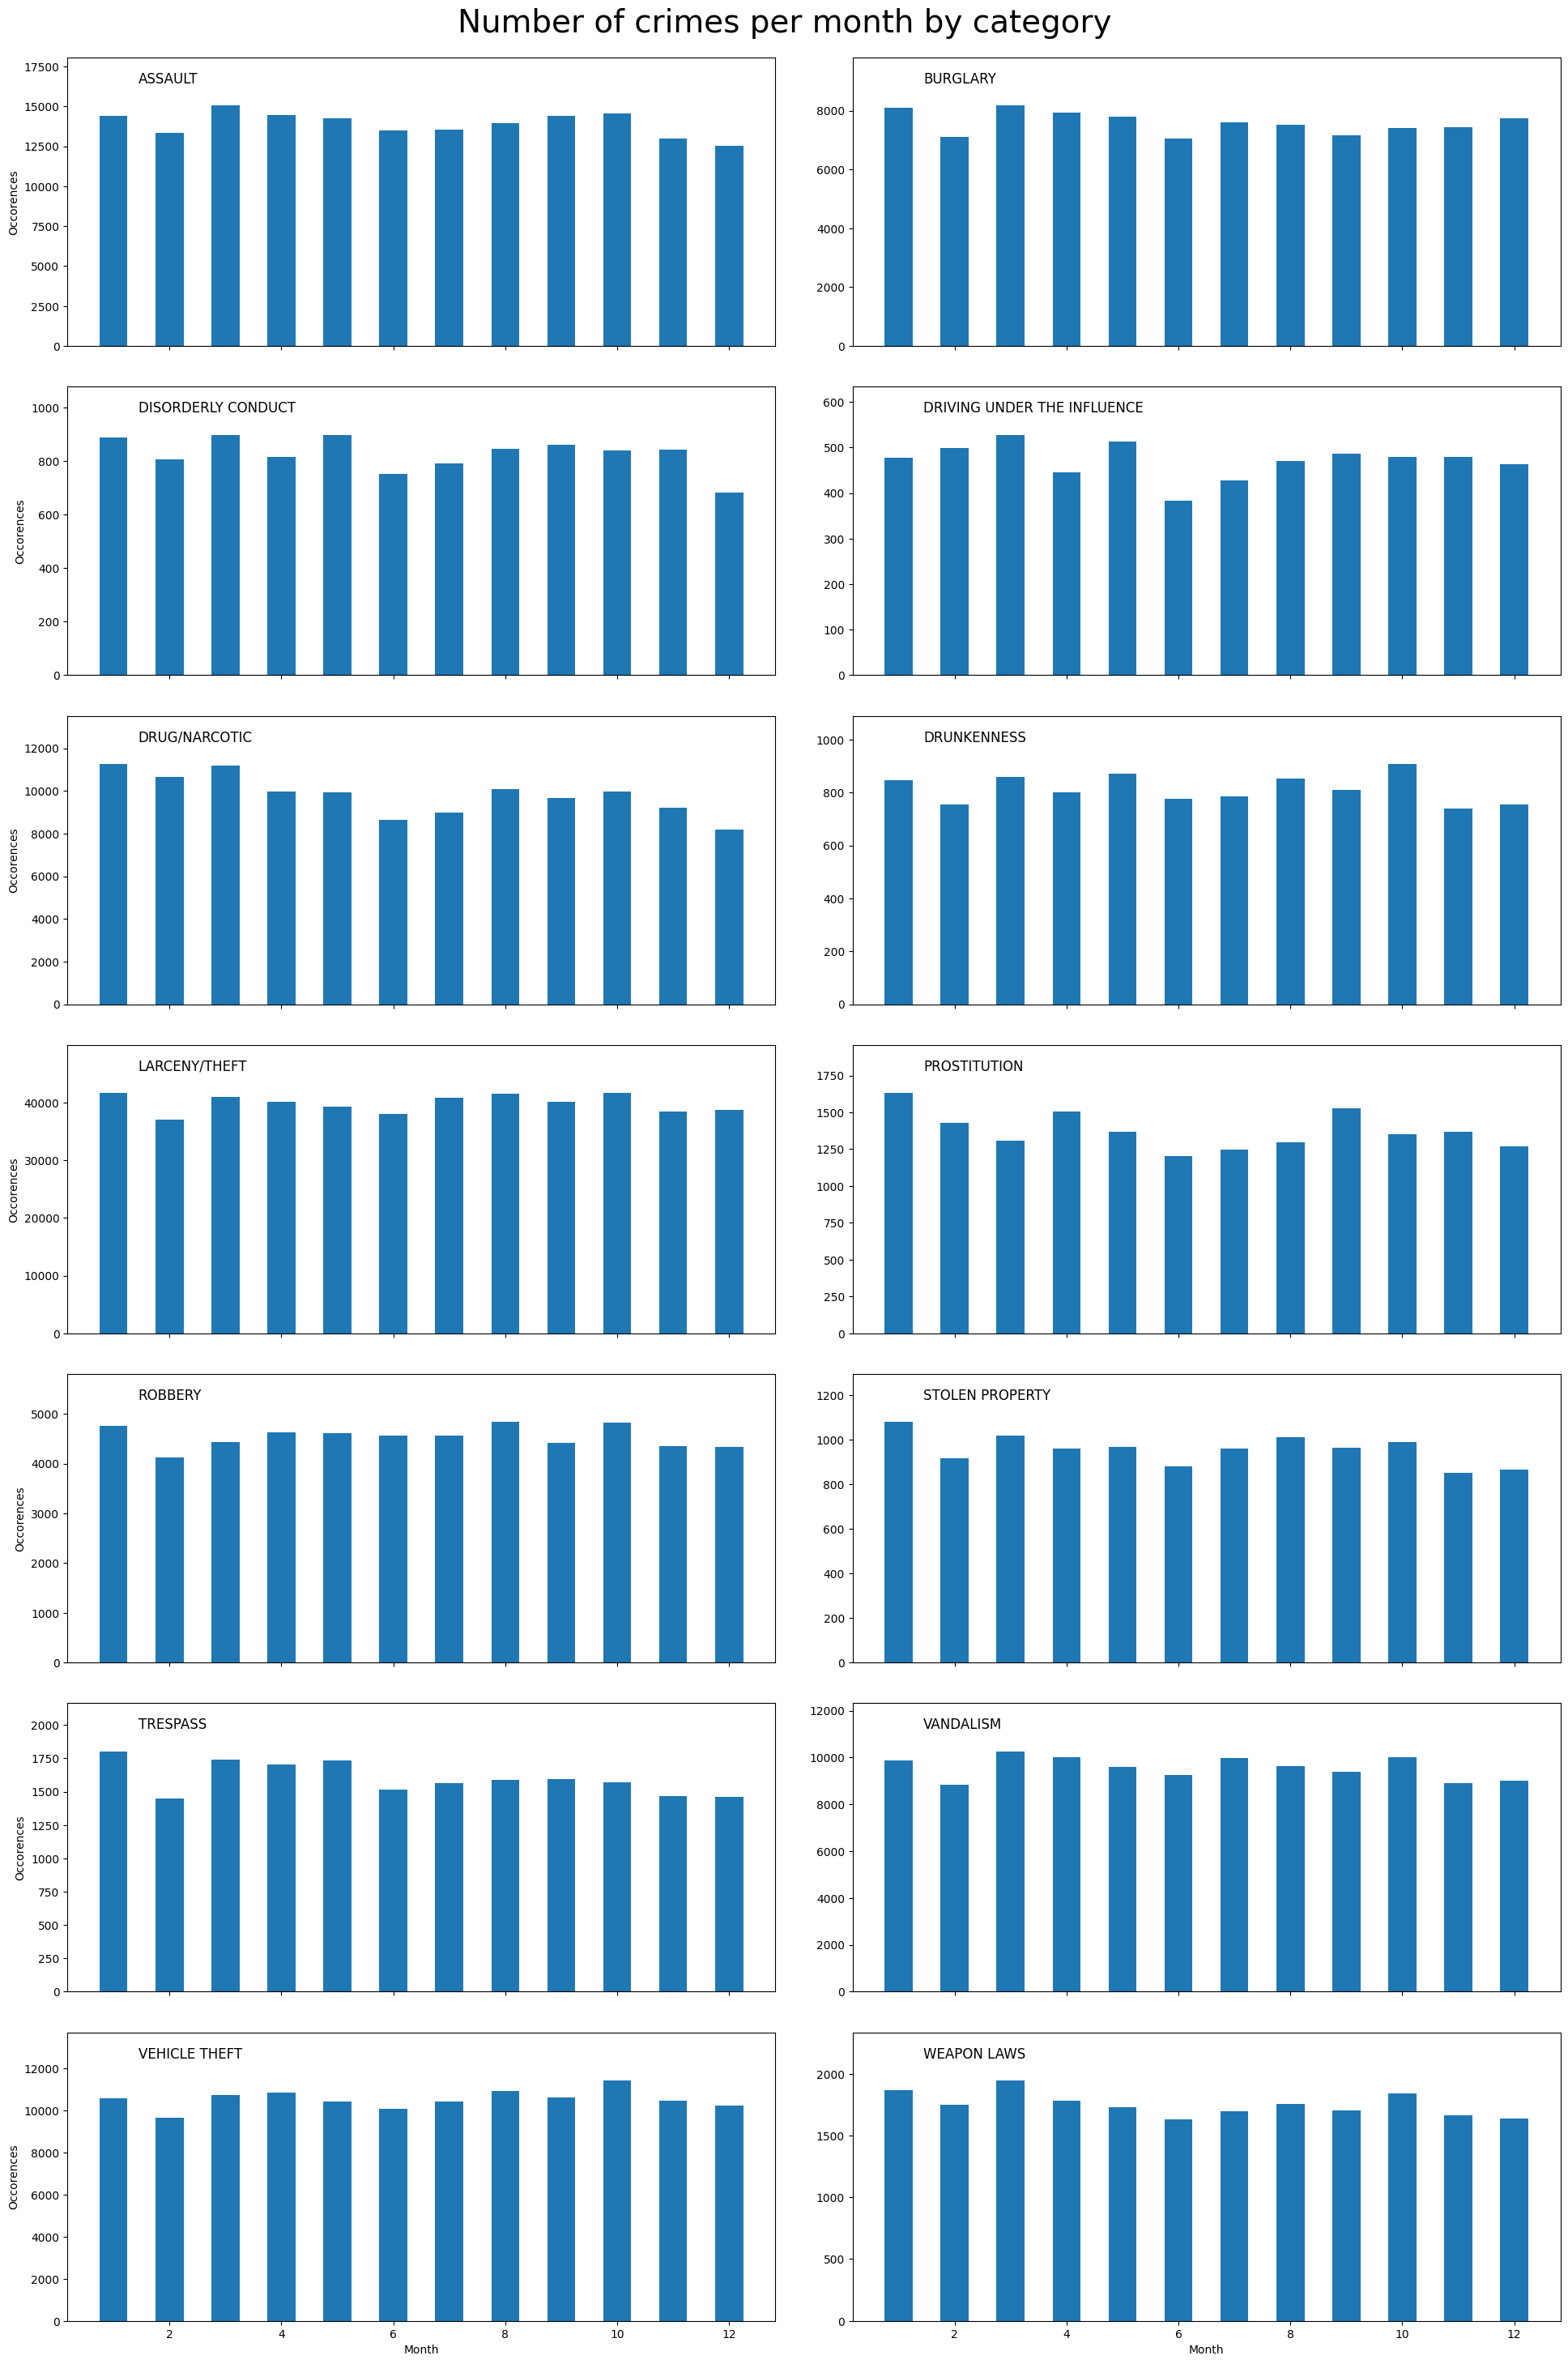

In [35]:
fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per month by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    crime_counts_per_month = crime_data['month'].value_counts().sort_index() # count the crimes per year for this category
    
    #crime_counts_per_day = crime_counts_per_day.reindex(sorted(crime_counts_per_day.index, key=lambda day: weekday_order[day])) # sort the in a normal week order

    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_month.index, crime_counts_per_month.values, width=0.5) # add data to the chart (x,y)
    
    # add / remove years and years-title on all or the last 2
    ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Month')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.


**Comments on the dataset**

#### The 24 hour cycle
We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on.     
Again: Give me a couple of comments on what you see.

In [36]:
#data['time'] = pd.to_datetime(data['Time'])
# data['time'] = pd.to_datetime(data['Time'], format='%H:%M')
# data['time'] = data['time'].dt.time
# data['time_numerical'] = data['time'].apply(lambda t: t.hour * 60 + t.minute)
data['hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour


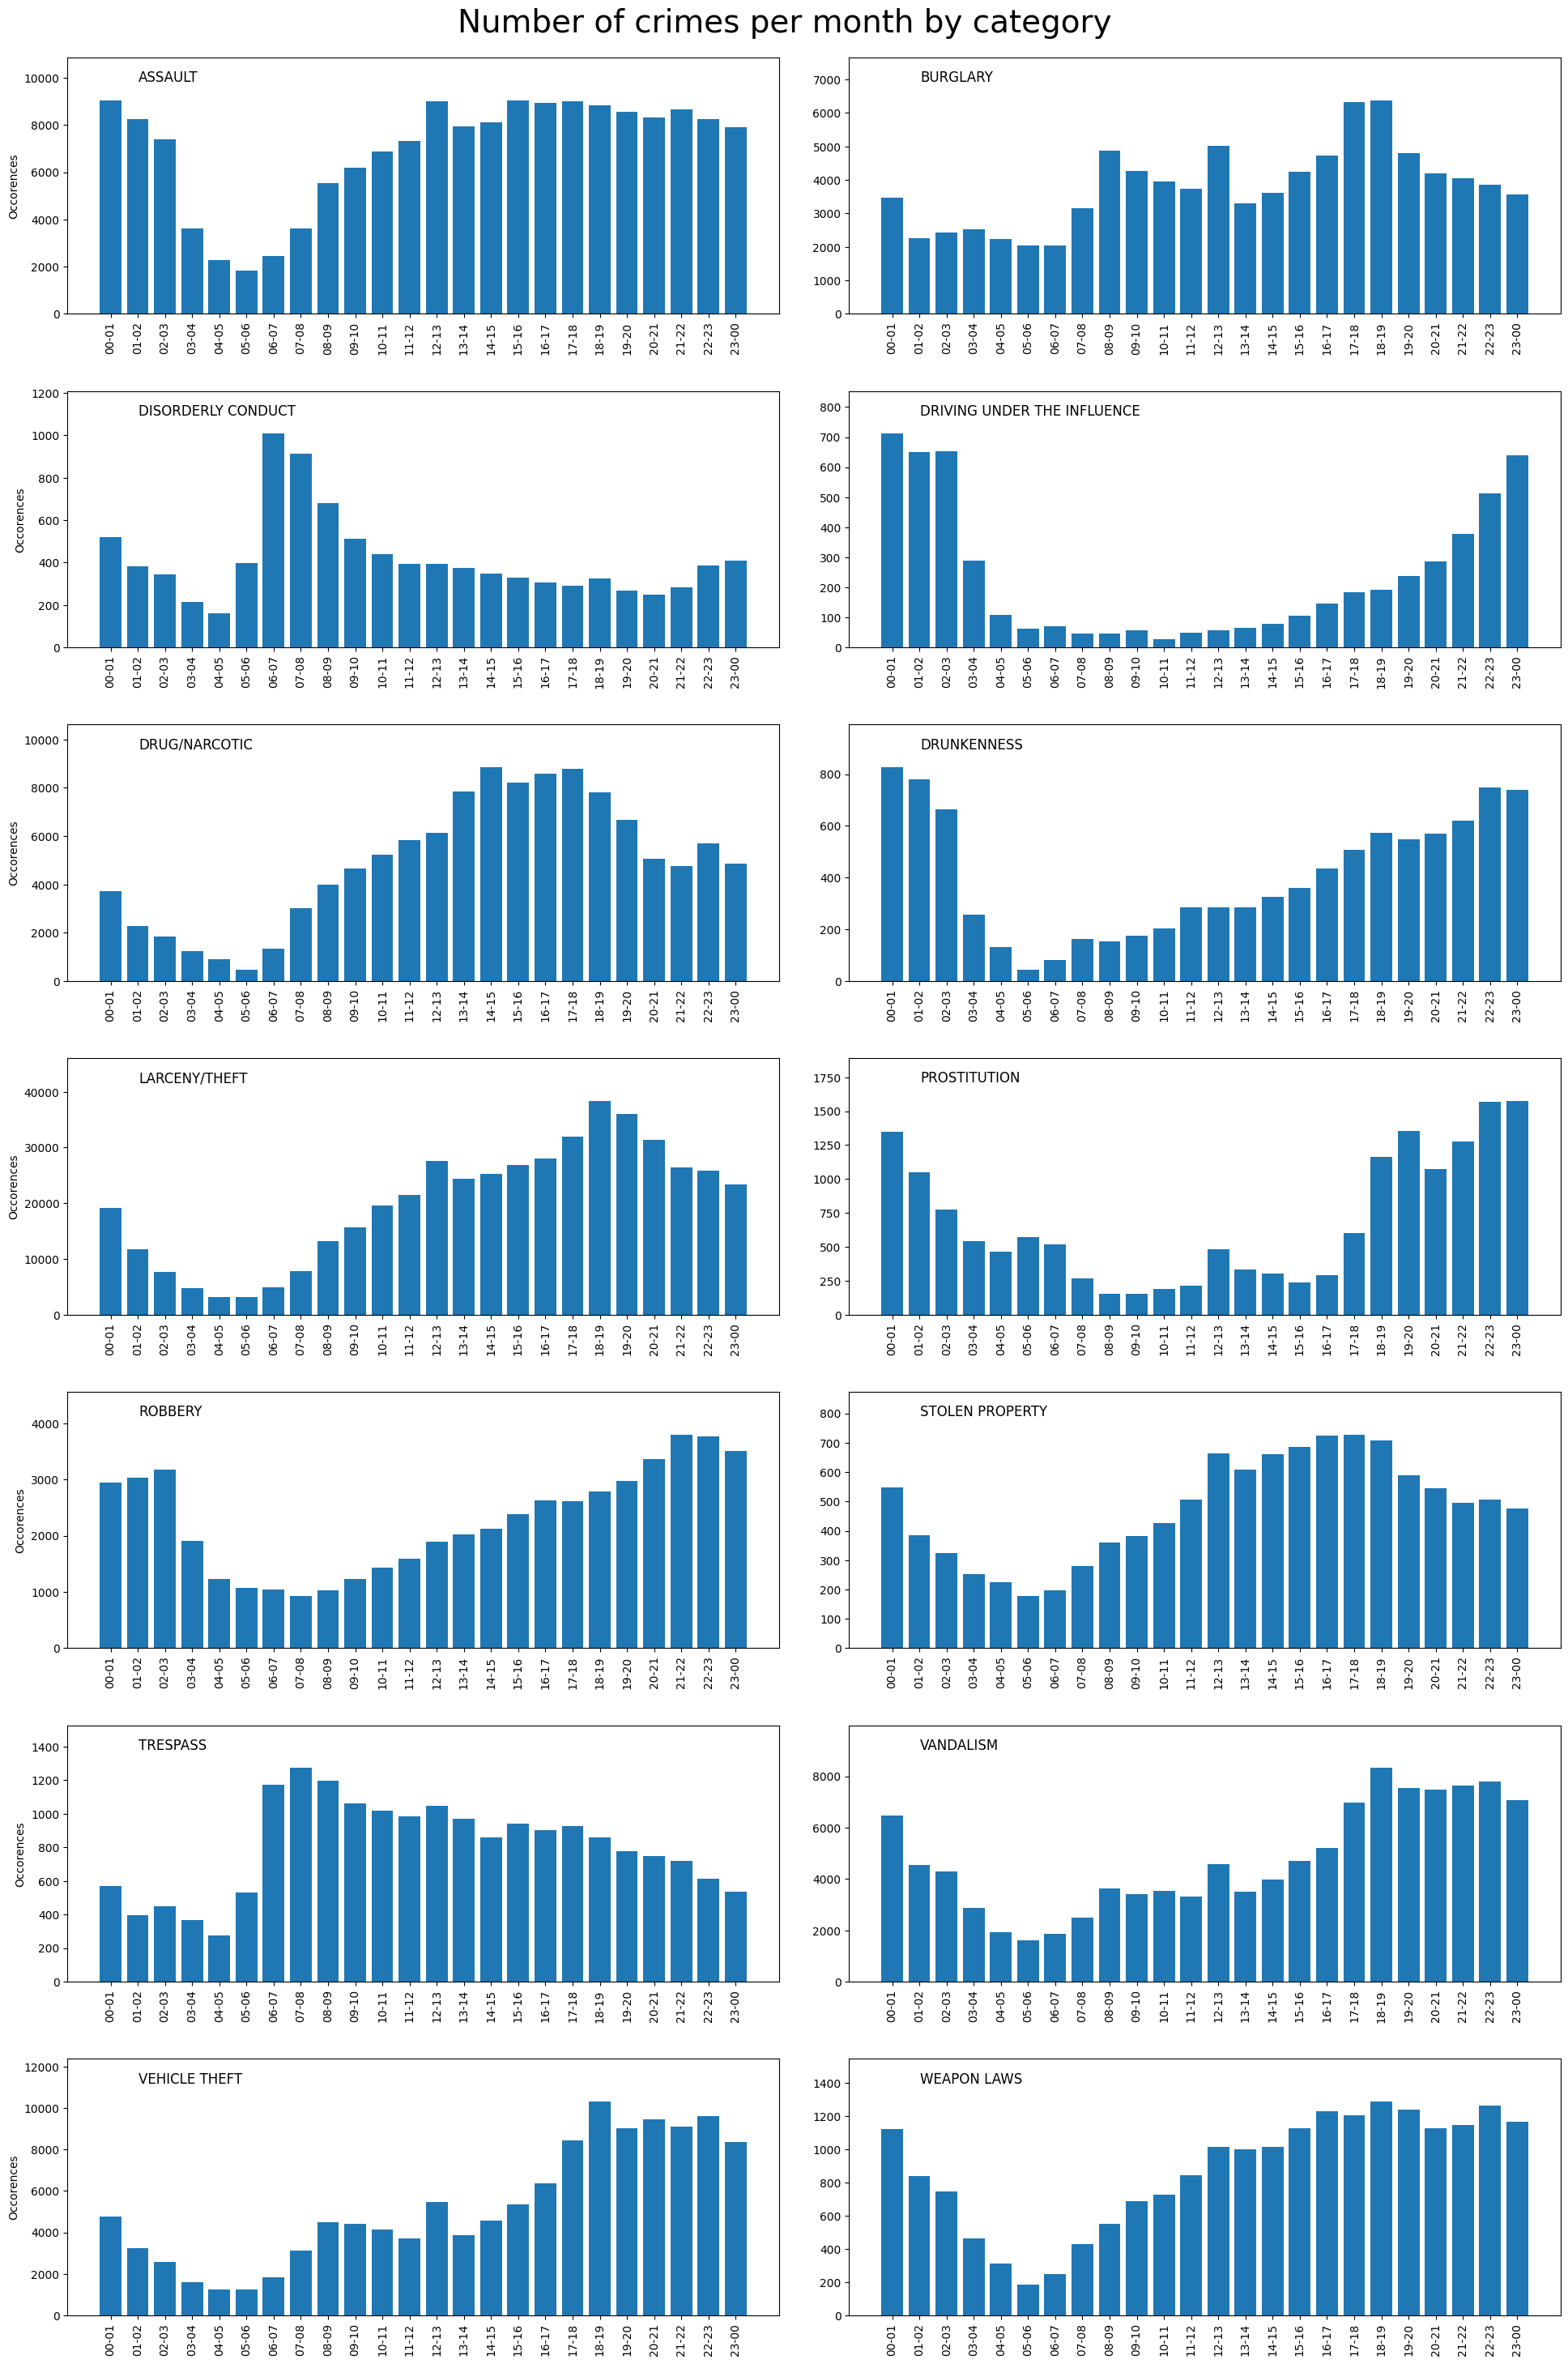

In [37]:
fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per month by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    #crime_counts_per_time = crime_data['time_numerical'].value_counts().sort_index() # count the crimes per year for this category
    
    crime_counts_per_hour = crime_data.groupby('hour').size()
    crime_counts_per_hour = crime_counts_per_hour.reindex(range(24), fill_value=0)
    


    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_hour.index, crime_counts_per_hour.values) # add data to the chart (x,y)
    
    ax.set_xticks(range(24))  # Set ticks for each hour
    ax.set_xticklabels([f'{hour:02d}-{(hour+1)%24:02d}' for hour in range(24)], rotation=90)  # Format labels as 'HH-HH'


    # add / remove years and years-title on all or the last 2
    #ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Time')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.


All crimesrates seams to be low in the early morning around 5-6    


#### Hours of the week. 
But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

In [38]:
weekday_order = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

In [39]:
data['day_num'] = data['DayOfWeek'].map(weekday_order)
data['hour_of_week'] = data['day_num'] * 24 + data['hour']

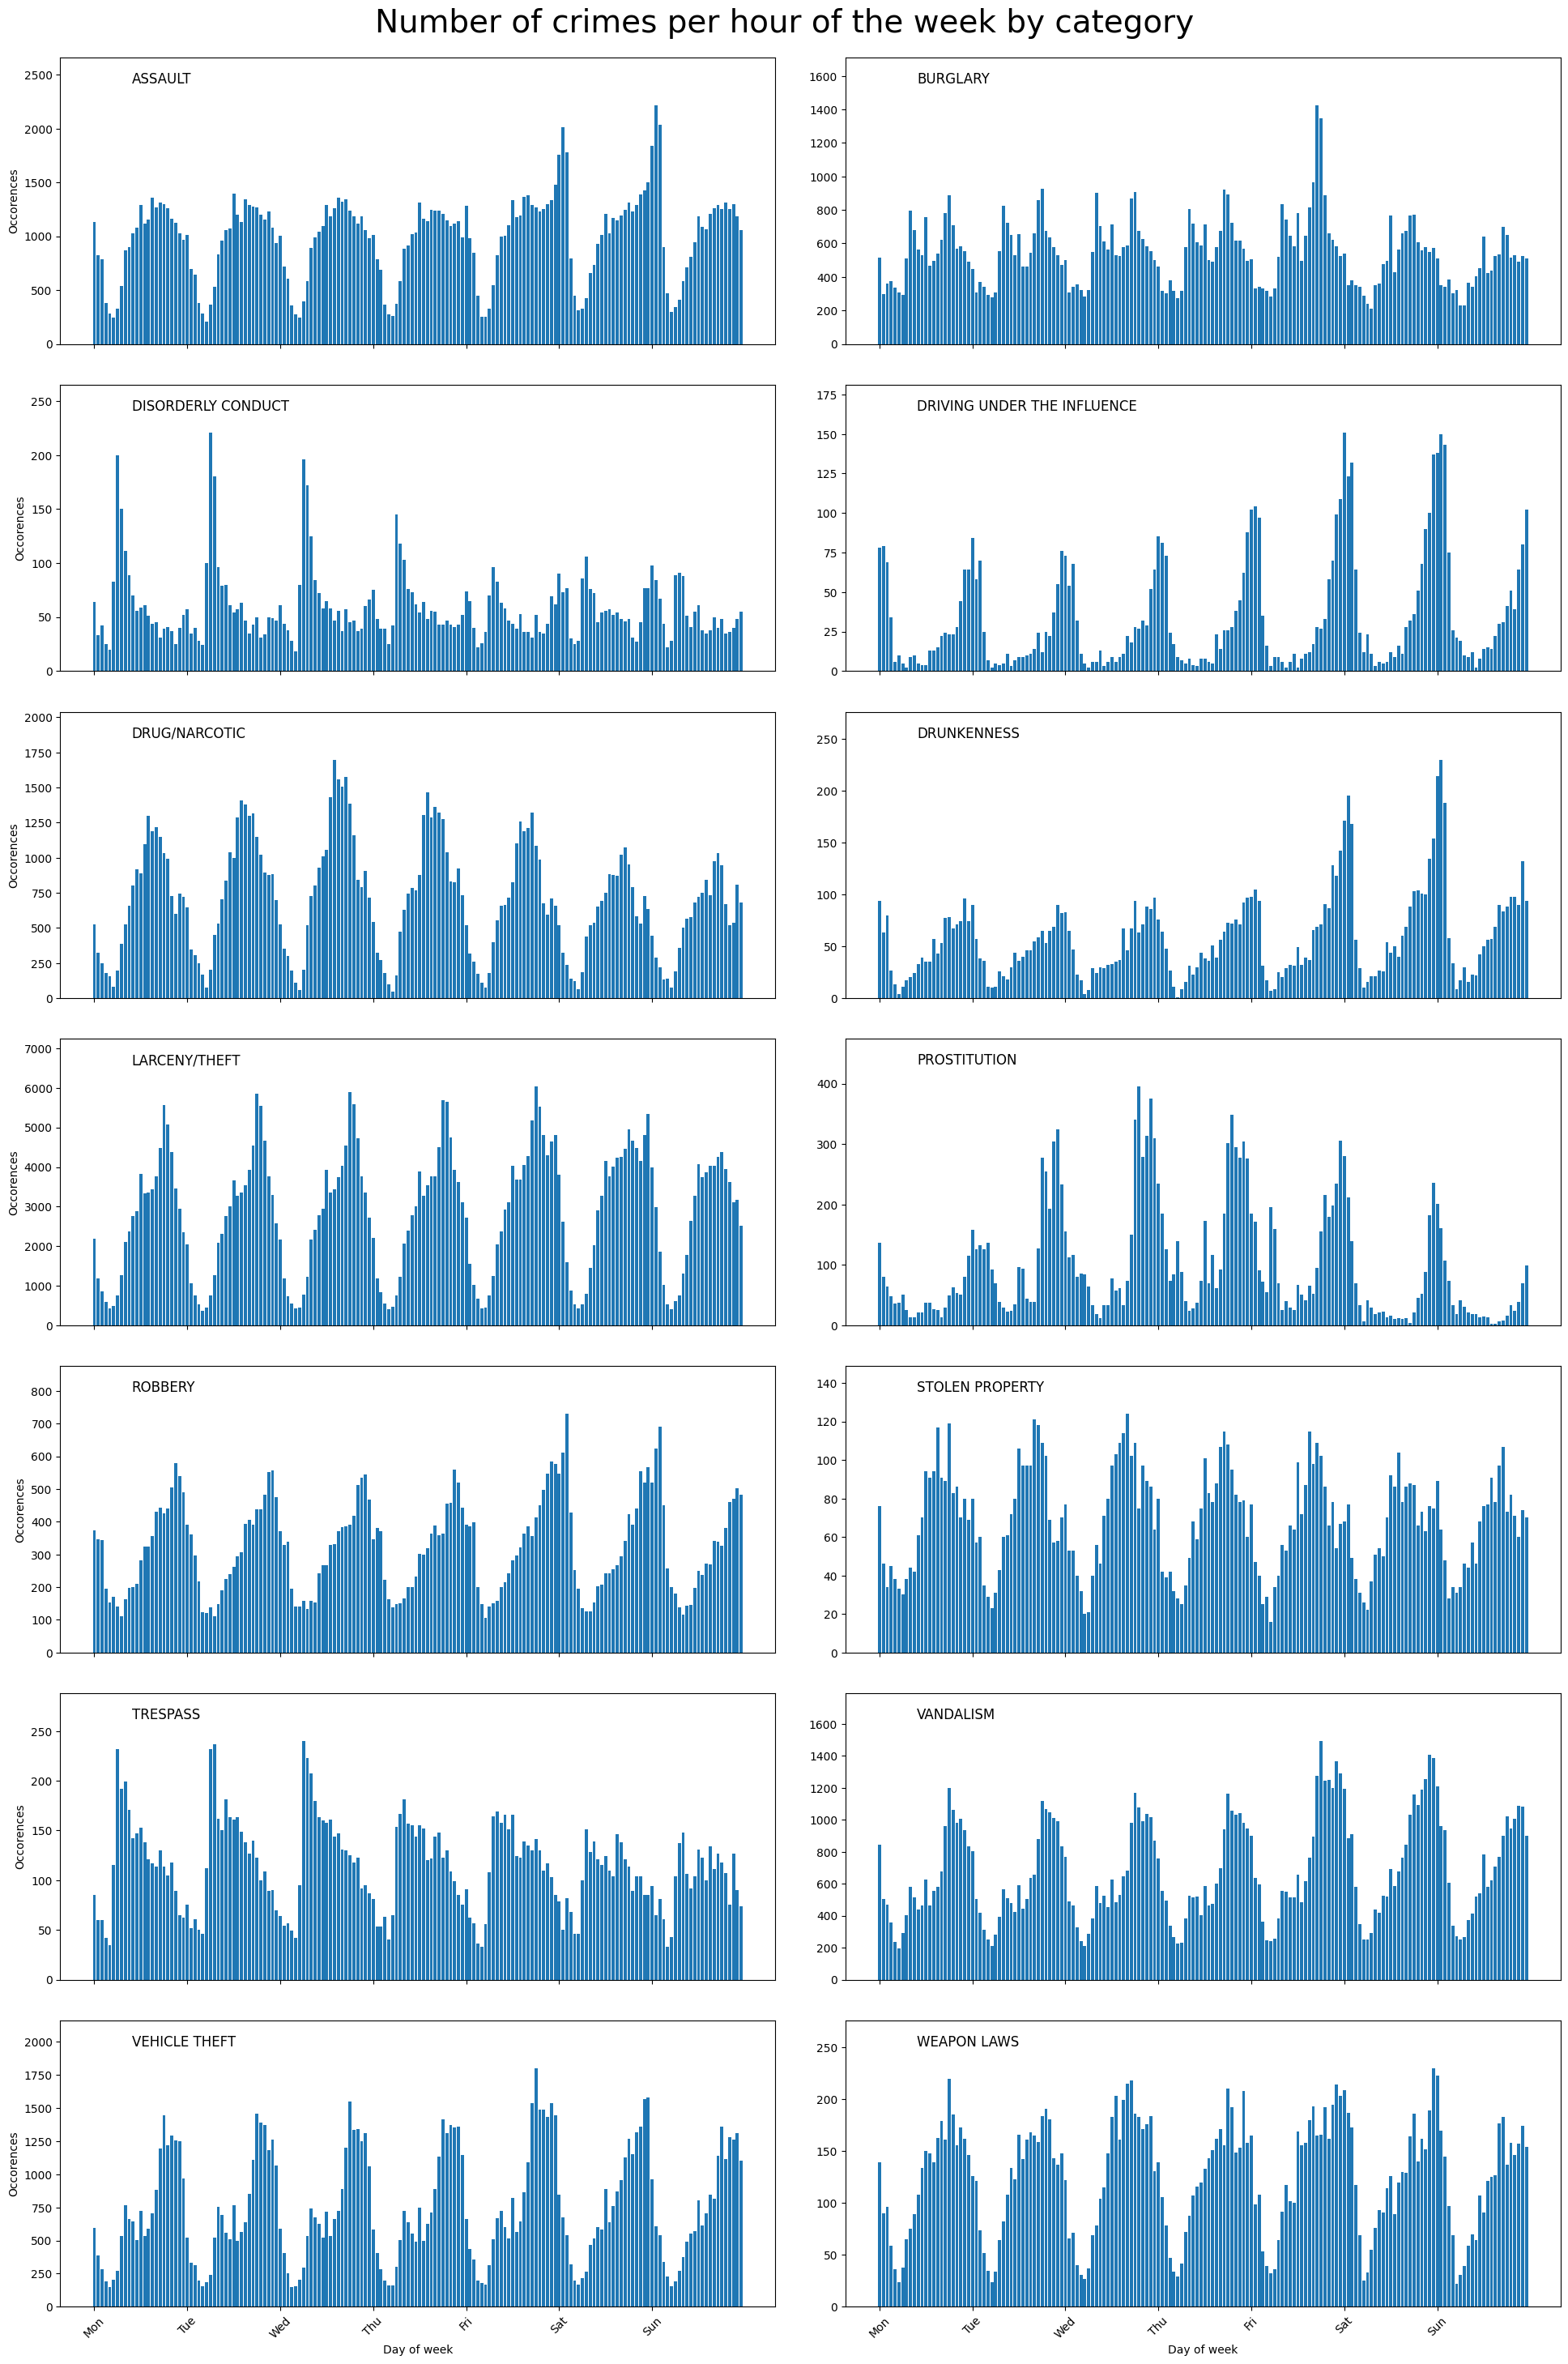

In [40]:
fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per hour of the week by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    
    crime_counts_per_hour_of_week = crime_data.groupby('hour_of_week').size()
    crime_counts_per_hour_of_week = crime_counts_per_hour_of_week.reindex(range(168), fill_value=0)

    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_hour_of_week.index, crime_counts_per_hour_of_week.values) # add data to the chart (x,y)
    
    ax.set_xticks(range(0, 168, 24))  # Set ticks for the start of each day
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)  # Days of the week

    # add / remove years and years-title on all or the last 2
    ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Day of week')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.

## Part 3: Creating nice plots

#### Create a list of 10 rules for nice plots based on the video.

1. Write explanatory **captions** to your plots
1. Be aware on the zoom level of your plots. It should make sence.
1. Have values that are compareble between related plots, or explain to the reader what he should be aware about if its not compareble.
1. Reduce the noise as much as possible. (colors, background etc.)
1. Name the axes
1. have meaningfull ranges of values in labels
1. Have a nicer font than default
1. Make an effort to make it look nice
1. Tighten your subplots (remove unnessesary spaces in between)
1. 

## Part 4: Exploring other types of plots for temporal data

#### Calendar plots. 

In [44]:
#%pip install calplot pandas

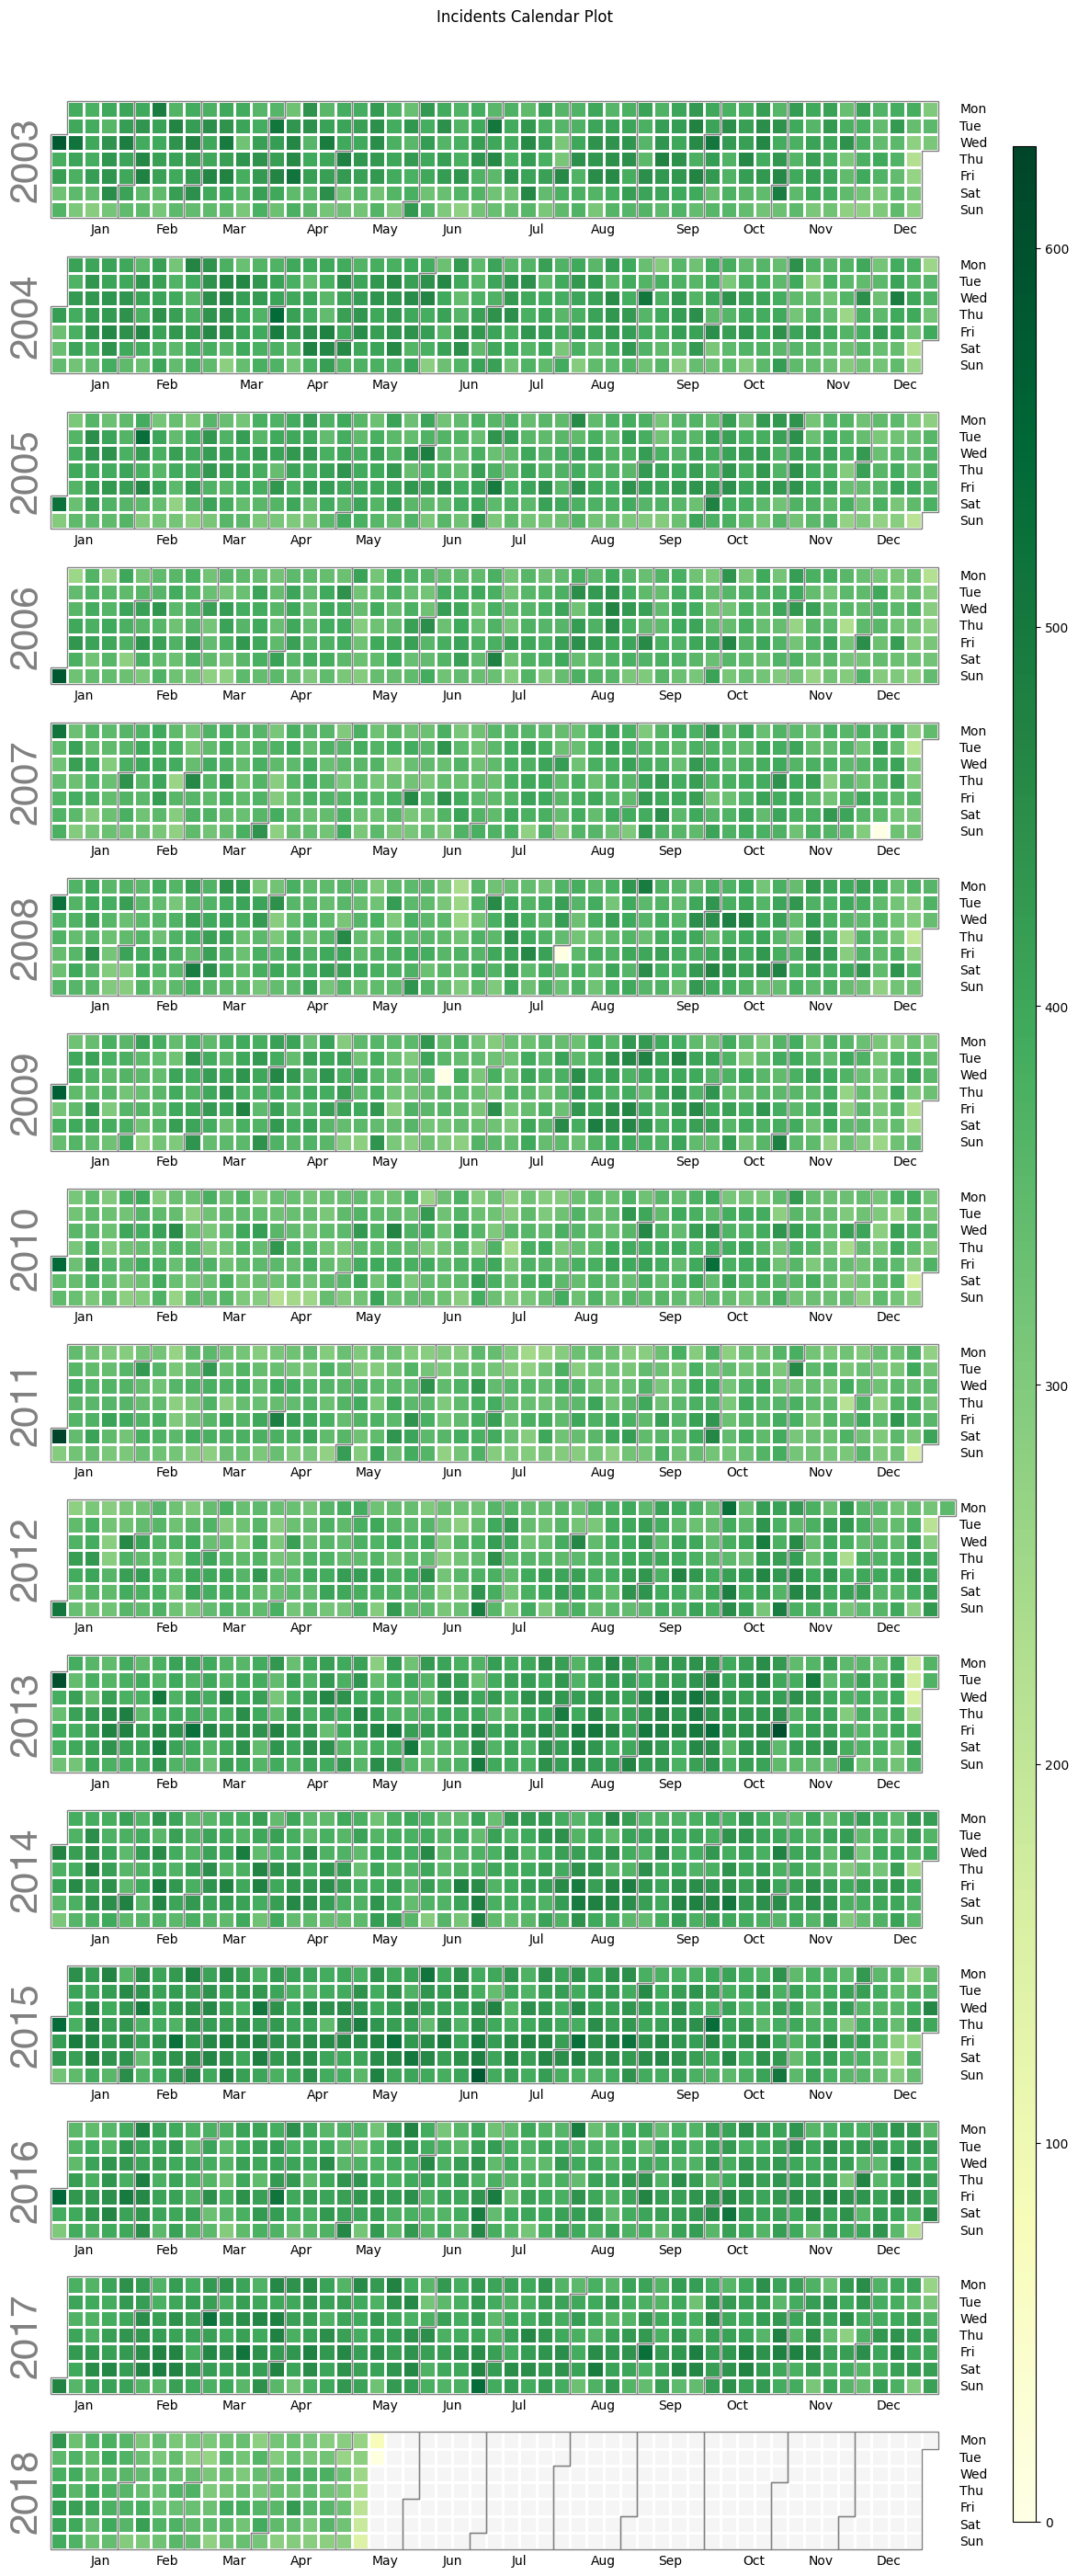

In [46]:
import calplot

# Load the dataset into a DataFrame
data = pd.read_csv("data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")

# Convert the 'Date' column to datetime objects
# Make sure to use the correct column name as it appears in your CSV file
data['Date'] = pd.to_datetime(data['Date'])

# Create a Series with the count of incidents per day
incident_counts = data['Date'].value_counts().sort_index()

# Plot the calendar heatmap
calplot.calplot(incident_counts, cmap='YlGn', suptitle='Incidents Calendar Plot')

# Show the plot
plt.show()


#### Polar bar chart

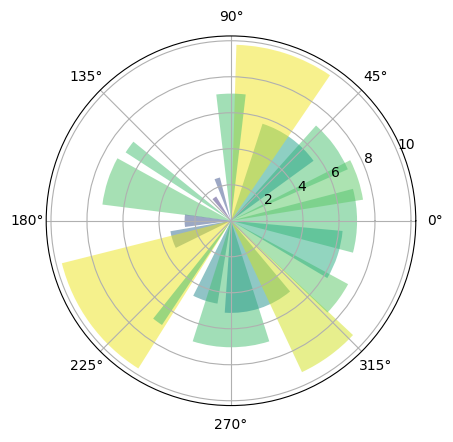

In [47]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

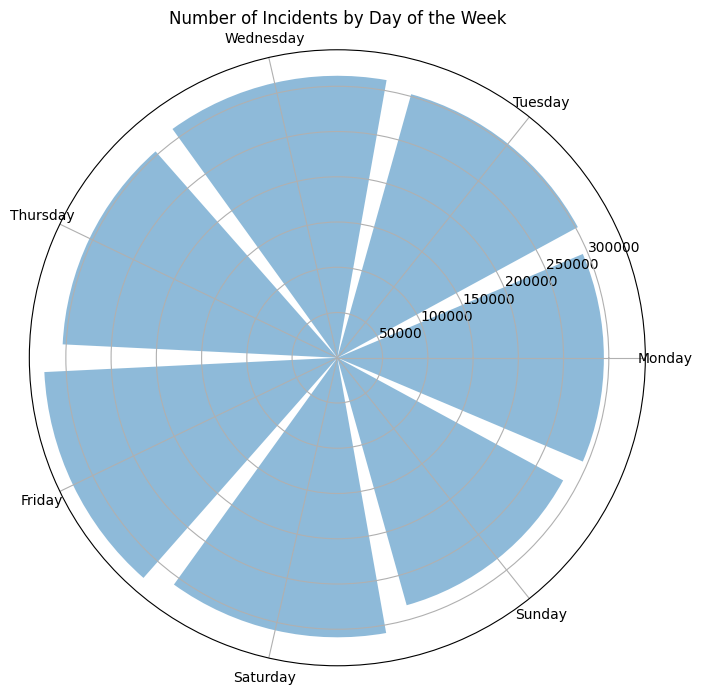

In [48]:
# Let's say the day of the week is stored in a column named 'DayOfWeek'
# We will create a mapping of days to numerical values (Monday=0, Sunday=6)
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
data['DayOfWeek'] = data['DayOfWeek'].map(day_mapping)

# Count the number of incidents for each day of the week
day_counts = data['DayOfWeek'].value_counts().sort_index()

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Compute the angle for each bar
theta = np.linspace(0.0, 2 * np.pi, len(day_counts), endpoint=False)

# Create the bars
bars = ax.bar(theta, day_counts, align='center', alpha=0.5)

# Set the labels for each bar (day of the week)
ax.set_xticks(theta)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Set the title and show the plot
ax.set_title('Number of Incidents by Day of the Week')
plt.show()


In [49]:
# Assuming 'DayOfWeek' and 'Category' columns exist
# Group by 'DayOfWeek' and 'Category' and count the incidents
grouped_data = data.groupby(['DayOfWeek', 'Category']).size().reset_index(name='counts')

# Pivot the data to have days of the week as the index and categories as columns
pivoted_data = grouped_data.pivot(index='DayOfWeek', columns='Category', values='counts').fillna(0)

# Create a mapping of days to numerical values (Monday=0, Sunday=6)
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
pivoted_data = pivoted_data.reindex(day_mapping.keys())  # Ensure the days are in the correct order

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Compute the angle for each bar
theta = np.linspace(0.0, 2 * np.pi, len(pivoted_data), endpoint=False)

# Width of each bar
width = (2 * np.pi) / len(pivoted_data)

# Plot a bar for each category, for each day
bottom = np.zeros(len(pivoted_data))  # Initialize the bottom of the stack
for category in pivoted_data.columns:
    heights = pivoted_data[category]
    bars = ax.bar(theta, heights, width=width, bottom=bottom, label=category, alpha=0.5)
    bottom += heights  # Update the bottom for the next stack

# Set the labels for each bar (day of the week)
ax.set_xticks(theta)
ax.set_xticklabels(day_mapping.keys())

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))

# Set the title and show the plot
ax.set_title('Number of Incidents by Category and Day of the Week')
plt.show()


ValueError: 'vertices' must be 2D with shape (N, 2), but your input has shape (0,)

<Figure size 1000x1000 with 1 Axes>

#### Time series

/var/folders/2t/3plkrfzx0pbf0752vdv6lspw0000gn/T/ipykernel_5691/3707189164.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = category_data.resample('M').size()


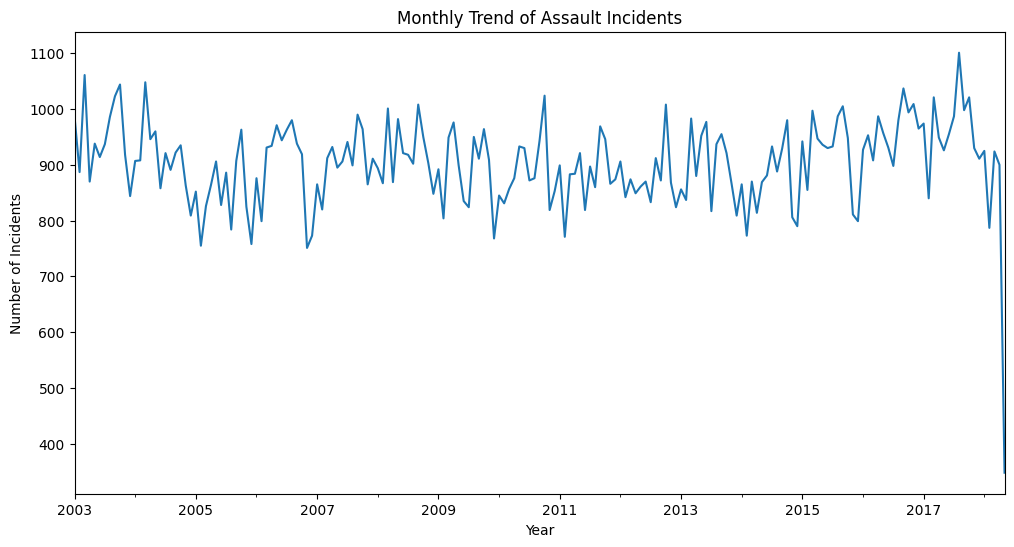

In [50]:

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index of the DataFrame
data.set_index('Date', inplace=True)

# Select a category to analyze, e.g., 'ASSAULT'
category_data = data[data['Category'] == 'ASSAULT']

# Resample the data to get the monthly count of incidents for the selected category
monthly_counts = category_data.resample('M').size()

# Plot the trend of the selected category over time
plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Monthly Trend of Assault Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()



#### What did you learn from using LLM's to simply solve everything in this exercise (in contrast to the previous ones).

I have less detailed knowledge about the code. in fact i did not focus on it at all. But my focus was on the result and on how i in Natual language could adjust the code/charts to fit to what i want. My previous knowledge came in handy when trying to adjust the code given by the LLM, but i could have focused on Natal Language only and getting the same result.

## Part 5: Back to visualizing patterns in the data

#### The types of crime and how they take place across San Francisco's police districts.

So now we'll be combining information about PdDistrict and Category to explore differences between SF's neighborhoods.     
**First, simply list the names of SF's 10 police districts.**

In [51]:
data = pd.read_csv("data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")
districts = set(data['PdDistrict'])

In [ ]:
districts

{'BAYVIEW',
 'CENTRAL',
 'INGLESIDE',
 'MISSION',
 'NORTHERN',
 'PARK',
 'RICHMOND',
 'SOUTHERN',
 'TARAVAL',
 'TENDERLOIN',
 nan}

**Which has the most crimes?**

In [ ]:
grouped = data.groupby('PdDistrict')
crime_counts = grouped.size()
crime_counts.sort_values(ascending=False)

PdDistrict
SOUTHERN      390692
MISSION       288985
NORTHERN      266435
CENTRAL       221923
BAYVIEW       205480
TENDERLOIN    186954
INGLESIDE     181092
TARAVAL       155461
PARK          119698
RICHMOND      112804
dtype: int64

The most crimes occour in SOUTHERN, which have a total of 390692 crimes over the whole period.

**Which has the most focus crimes?**

In [ ]:
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'}
focuscrimes = pd.Series(sorted(focuscrimes))
filtered_data = data[data['Category'].isin(focuscrimes)]
grouped = filtered_data.groupby('PdDistrict')
crime_counts = grouped.size().sort_values(ascending=False)
crime_counts

PdDistrict
SOUTHERN      226805
NORTHERN      172194
MISSION       162971
CENTRAL       139961
BAYVIEW       112054
TENDERLOIN    104950
INGLESIDE     101328
TARAVAL        88132
PARK           67645
RICHMOND       66770
dtype: int64

The most crimes within the focuscrimes set also occour in SOUTHERN, which have a total of 226805 crimes over the whole period.

#### I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical

First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole.     
That's simply a normalized version of this plot. Let's call it P(crime)

In [ ]:
grouped = data.groupby('Category')
p_crime = grouped.size().sort_values(ascending=False) / len(data)
p_crime

Category
LARCENY/THEFT                  0.224451
OTHER OFFENSES                 0.141756
NON-CRIMINAL                   0.111259
ASSAULT                        0.078441
VEHICLE THEFT                  0.059275
DRUG/NARCOTIC                  0.055327
VANDALISM                      0.053870
WARRANTS                       0.046875
BURGLARY                       0.042764
SUSPICIOUS OCC                 0.037138
ROBBERY                        0.025577
MISSING PERSON                 0.020788
FRAUD                          0.019417
FORGERY/COUNTERFEITING         0.010798
SECONDARY CODES                0.010508
WEAPON LAWS                    0.009863
TRESPASS                       0.009013
PROSTITUTION                   0.007749
STOLEN PROPERTY                0.005377
DISORDERLY CONDUCT             0.004664
DRUNKENNESS                    0.004583
SEX OFFENSES, FORCIBLE         0.004107
RECOVERED VEHICLE              0.004080
DRIVING UNDER THE INFLUENCE    0.002654
KIDNAPPING                     

Here we see each crime category and its properbillity. The probability of observing each type of crime in the dataset as a whole. P(crime)

#### Calculate that same probability distribution but for each PD district, let's call that P(crime|district).

In [ ]:
grouped = data.groupby(['PdDistrict', 'Category'])
crime_counts = grouped.size().reset_index(name='counts')
prop_of_crime_district = grouped.size() / crime_counts.groupby('PdDistrict')['counts'].sum()
prop_of_crime_district

PdDistrict  Category     
BAYVIEW     ARSON            0.004818
            ASSAULT          0.097411
            BAD CHECKS       0.000355
            BRIBERY          0.000759
            BURGLARY         0.046749
                               ...   
TENDERLOIN  TRESPASS         0.014314
            VANDALISM        0.022262
            VEHICLE THEFT    0.012677
            WARRANTS         0.087754
            WEAPON LAWS      0.010858
Length: 367, dtype: float64

GPT Feedback solution

In [ ]:
grouped = data.groupby(['PdDistrict', 'Category'])
crime_counts = grouped.size().reset_index(name='counts')
total_crimes_per_district = crime_counts.groupby('PdDistrict')['counts'].sum()
crime_counts['total_district_crimes'] = crime_counts['PdDistrict'].map(total_crimes_per_district)
crime_counts['prop_crime_district'] = crime_counts['counts'] / crime_counts['total_district_crimes']
crime_counts

,PdDistrict,Category,counts,total_district_crimes,prop_crime_district
0,BAYVIEW,ARSON,990,205480,0.004818
1,BAYVIEW,ASSAULT,20016,205480,0.097411
2,BAYVIEW,BAD CHECKS,73,205480,0.000355
3,BAYVIEW,BRIBERY,156,205480,0.000759
4,BAYVIEW,BURGLARY,9606,205480,0.046749
...,...,...,...,...,...
362,TENDERLOIN,TRESPASS,2676,186954,0.014314
363,TENDERLOIN,VANDALISM,4162,186954,0.022262
364,TENDERLOIN,VEHICLE THEFT,2370,186954,0.012677
365,TENDERLOIN,WARRANTS,16406,186954,0.087754


Now we look at the ratio **P(crime|district)/P(crime)**. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs more frequently within that district. If it's smaller than one, it means that the crime is rarer within the district in question than in the city as a whole.

In [57]:
prop_of_crime_district_p_crime = prop_of_crime_district / p_crime
prop_of_crime_district_p_crime

PdDistrict  Category     
BAYVIEW     ARSON            2.647748
            ASSAULT          1.241838
            BAD CHECKS       0.818774
            BRIBERY          2.031069
            BURGLARY         1.093188
                               ...   
TENDERLOIN  TRESPASS         1.588066
            VANDALISM        0.413255
            VEHICLE THEFT    0.213865
            WARRANTS         1.872099
            WEAPON LAWS      1.100885
Length: 367, dtype: float64

#### For each district plot these ratios for the 14 focus crimes. 

/var/folders/2t/3plkrfzx0pbf0752vdv6lspw0000gn/T/ipykernel_5691/1801109882.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=4.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts


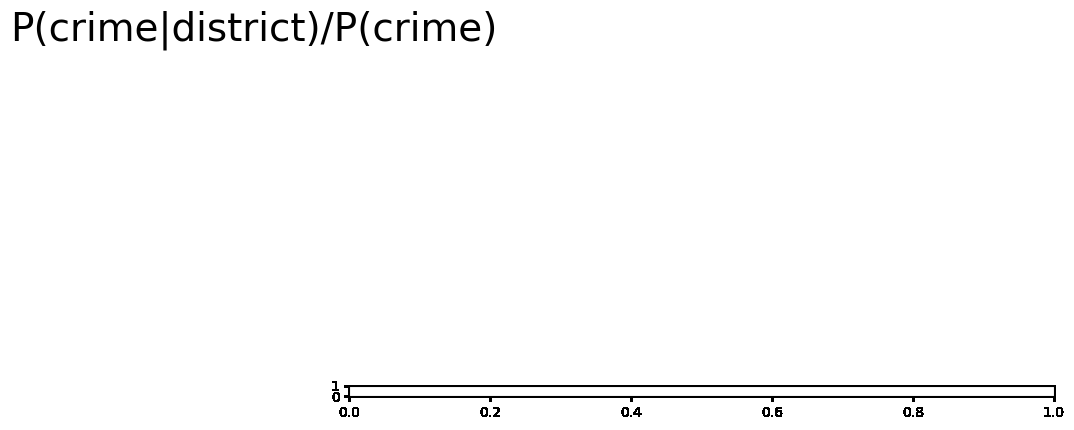

In [59]:
fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('P(crime|district)/P(crime)', fontsize=28) # add the main title to the figure on top of all plots

for district in prop_of_crime_district_p_crime:

    # add the data to a subplot
    ax = fig.add_subplot(len(prop_of_crime_district_p_crime) // 2, 2, i)

# for i, category in enumerate(focuscrimes, start=1):

#     crime_data = data[data['Category'] == category] # filter the dataset by category    
#     crime_counts_per_day = crime_data['DayOfWeek'].value_counts()#.sort_index() # count the crimes per week-day for this category
    
#     crime_counts_per_day = crime_counts_per_day.reindex(sorted(crime_counts_per_day.index, key=lambda day: weekday_order[day])) # sort the in a normal week order

#     # add the data to a subplot
#     ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
#     ax.margins(y=0.2) # margin from bars to top of the axes 
#     ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
#     ax.bar(crime_counts_per_day.index, crime_counts_per_day.values, width=0.5) # add data to the chart (x,y)
    
#     # add / remove years and years-title on all or the last 2
#     ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Category')

#     if i % 2 != 0:
#         ax.set_ylabel('Ratio')  # y-label on all plots in the left row only

plt.tight_layout(pad=4.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.
